### Import Libraries and Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Display Data

In [2]:

df = pd.read_csv('questions.csv')
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [3]:
df.shape

(404351, 6)

In [4]:
# Sample Data
new_df = df.sample(30000,random_state=42)

In [5]:
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                         How does the Boggart work?   
324466  What is difference between project manager and...   
398558  What hotel in Jabalpur would be safe for unmar...   
339914  What is stronger - Super Saiyan 4 or Super Sai...   
185732  How do I fill in Address Line 1 and Address Li...   

                                                question2  is_duplicate  
120567            What would the boggart of a boggart be?             0  
324466  What are the differences between project manag...             0  
398558  What hotel in Allahabad would be safe for unma...             0  
339914           How does Gohan turn into Super Saiyan 2?             0  
185732             How do I register desired web address?             0

### Preprocess Function 

In [6]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    
    #importing the Stemming function from nltk library
    #defining the object for stemming
    
    porter_stemmer = PorterStemmer()
    #defining a function for stemming
    def stemming(text):
        stem_text = [porter_stemmer.stem(word) for word in text]
        return stem_text
    
    # Tokenization
    def tokenization(text):
        tokens = re.split('W+',text)
        return tokens

    # Function to apply POS tagging to a sentence
    def pos_tagging(sentence):
        tokens = word_tokenize(sentence)
        pos_tags = pos_tag(tokens)
        return pos_tags
    
    return q
    

In [7]:
# Applying Preprocessing function
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [8]:
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  
120567             what would the boggart of a boggart be             0  
324466  what are the differences between project manag...             0  
398558  what hotel in allahabad would be safe for unma...             0  
339914            how does gohan turn into super saiyan 2             0  
185732              how do i register desired web address             0

### Feature Engineering 

In [9]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [10]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
120567      25      38             5             8  
324466      62      75             9            10  
398558     123     124            23            23  
339914      53      39            12             8  
185732      50      37            12             7

In [11]:
# Common and Total Words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [12]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
120567      25      38             5             8            2  
324466      62      75             9            10            4  
398558     123     124            23            23           18  
339914      53      39            12             8            2  
185732      50      37            12             7            4

In [13]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [14]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
120567      25      38             5             8            2          12  
324466      62      75             9            10            4          17  
398558     123     124            23            23           18          38  
339914      53      39            12             8            2          17  
185732      50      37            12             7            4          17

In [15]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
120567      25      38             5             8            2          12   
324466      62      75             9            10            4          17   
398558     123     124            23            23           18          38   
339914      53      39            12             8            2          17   
185732      50      37            12             7            4          17   

        word_share  
120567        0.17  
324466        0.24  
398558        0.47  
339914        0.12  
185732        0.24

## Advanced Token Features

In [16]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


### Length-Based Features

In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
120567      25      38             5             8  ...          12   
324466      62      75             9            10  ...          17   
398558     123     124            23            23  ...          38   
339914      53      39            12             8  ...          17   
185732      50      37            12             7  ...          17   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
120567        0.17  0.499975  0.499975  0.333322  0.199996  0.399992   
324466        0.24  0.249994  0.249994  0.749981  0.599988  0.444440   
398558        0.47  0.909083  0.909083  0.999986  0.999986  0.849996   
339914        0.12  0.399992  0.399992  0.000000  0.000000  0.249997   
185732        0.24  0.249994  0.199996  0.999967  0.599988  0.571420   

         ctc_max  last_word_eq  first_word_eq  
120567  0.249997           0.0            0.0  
324466  0.399996           0.0            1.0  
398558  0.849996           1.0            1.0  
339914  0.199998           0.0            0.0  
185732  0.333331           0.0            1.0  

[5 rows x 21 columns]

In [19]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [20]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [21]:
new_df.head()

id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
120567      25      38             5             8  ...  0.499975  0.333322   
324466      62      75             9            10  ...  0.249994  0.749981   
398558     123     124            23            23  ...  0.909083  0.999986   
339914      53      39            12             8  ...  0.399992  0.000000   
185732      50      37            12             7  ...  0.199996  0.999967   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
120567  0.199996  0.399992  0.249997           0.0            0.0   
324466  0.599988  0.444440  0.399996           0.0            1.0   
398558  0.999986  0.849996  0.849996           1.0            1.0   
339914  0.000000  0.249997  0.199998           0.0            0.0   
185732  0.599988  0.571420  0.333331           0.0            1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
120567           3.0       6.5              0.500000  
324466           1.0       9.5              0.365079  
398558           0.0      20.0              0.814516  
339914           2.0       9.0              0.350000  
185732           5.0       9.5              0.236842  

[5 rows x 24 columns]

### Fuzzy Features

In [22]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [23]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [24]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
120567  120567  238932  238933   
324466  324466  636476  636477   
398558  398558  778728  778729   
339914  339914  666314  666315   
185732  185732  366764  366765   

                                                question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  is_duplicate  \
120567             what would the boggart of a boggart be             0   
324466  what are the differences between project manag...             0   
398558  what hotel in allahabad would be safe for unma...             0   
339914            how does gohan turn into super saiyan 2             0   
185732              how do i register desired web address             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
120567      25      38             5             8  ...  0.249997   
324466      62      75             9            10  ...  0.399996   
398558     123     124            23            23  ...  0.849996   
339914      53      39            12             8  ...  0.199998   
185732      50      37            12             7  ...  0.333331   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
120567           0.0            0.0           3.0       6.5   
324466           0.0            1.0           1.0       9.5   
398558           1.0            1.0           0.0      20.0   
339914           0.0            0.0           2.0       9.0   
185732           0.0            1.0           5.0       9.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
120567              0.500000          57                  68   
324466              0.365079          76                  77   
398558              0.814516          96                  95   
339914              0.350000          48                  54   
185732              0.236842          46                  54   

        token_sort_ratio  token_set_ratio  
120567                57               65  
324466                74               76  
398558                92               96  
339914                49               55  
185732                57               60  

[5 rows x 28 columns]

### Plotting Diagrams for Better understanding

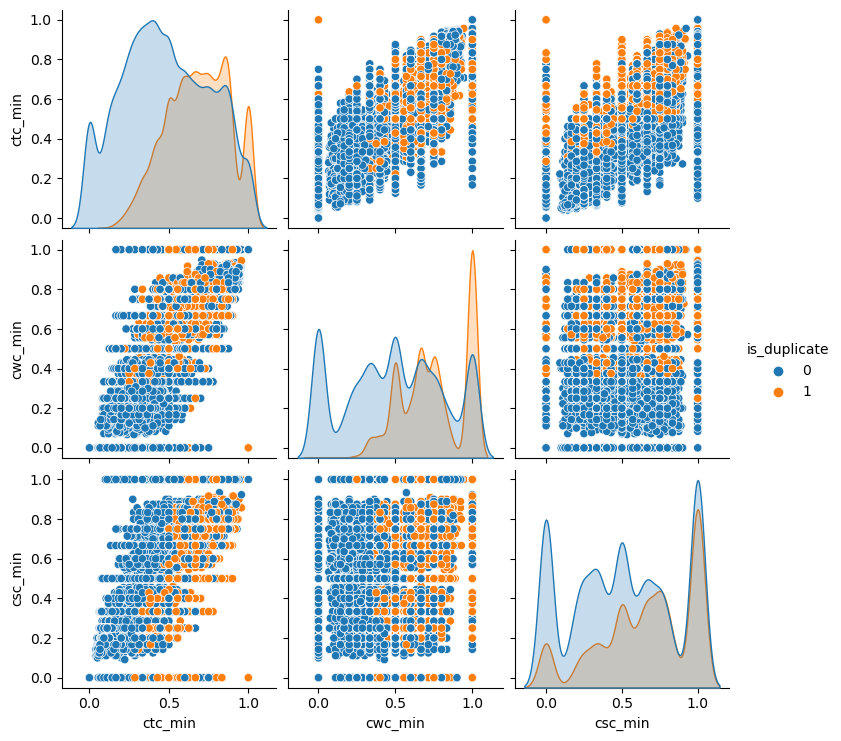

In [25]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

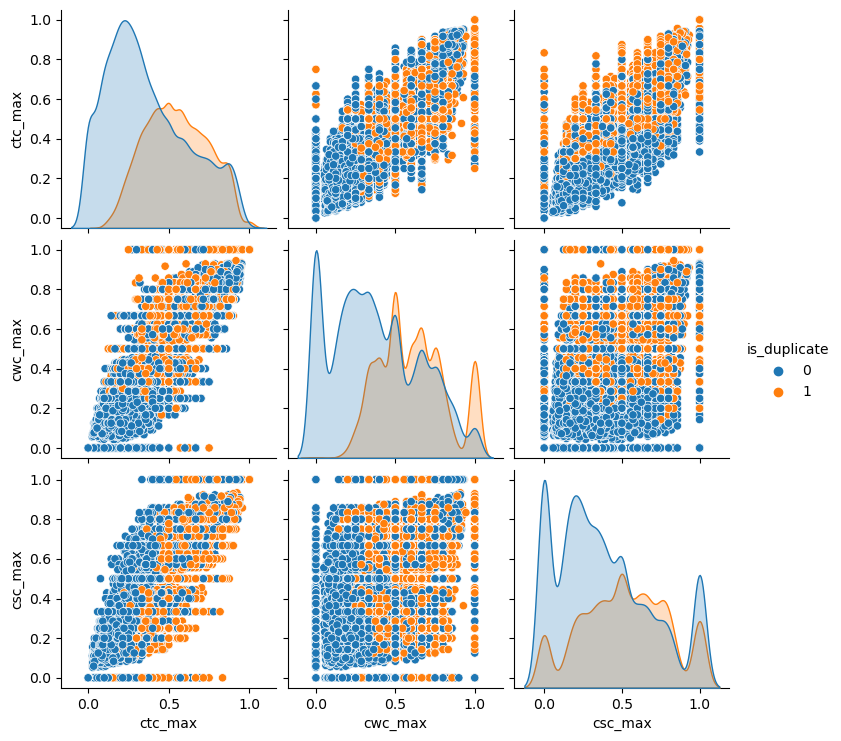

In [26]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

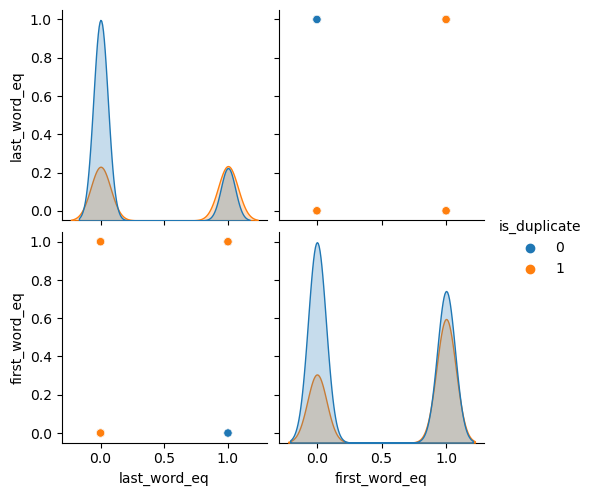

In [27]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

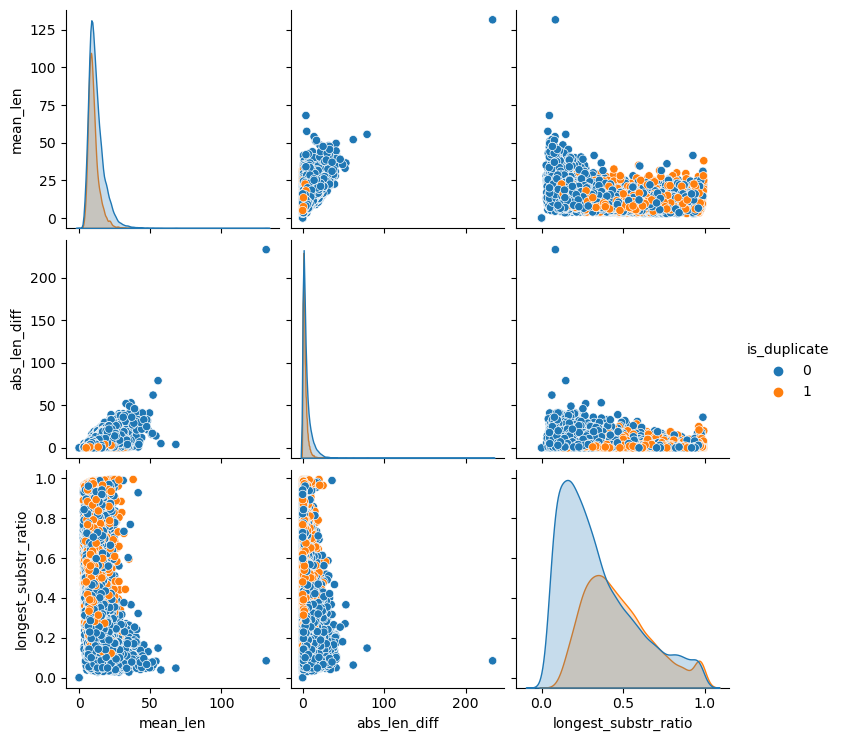

In [28]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

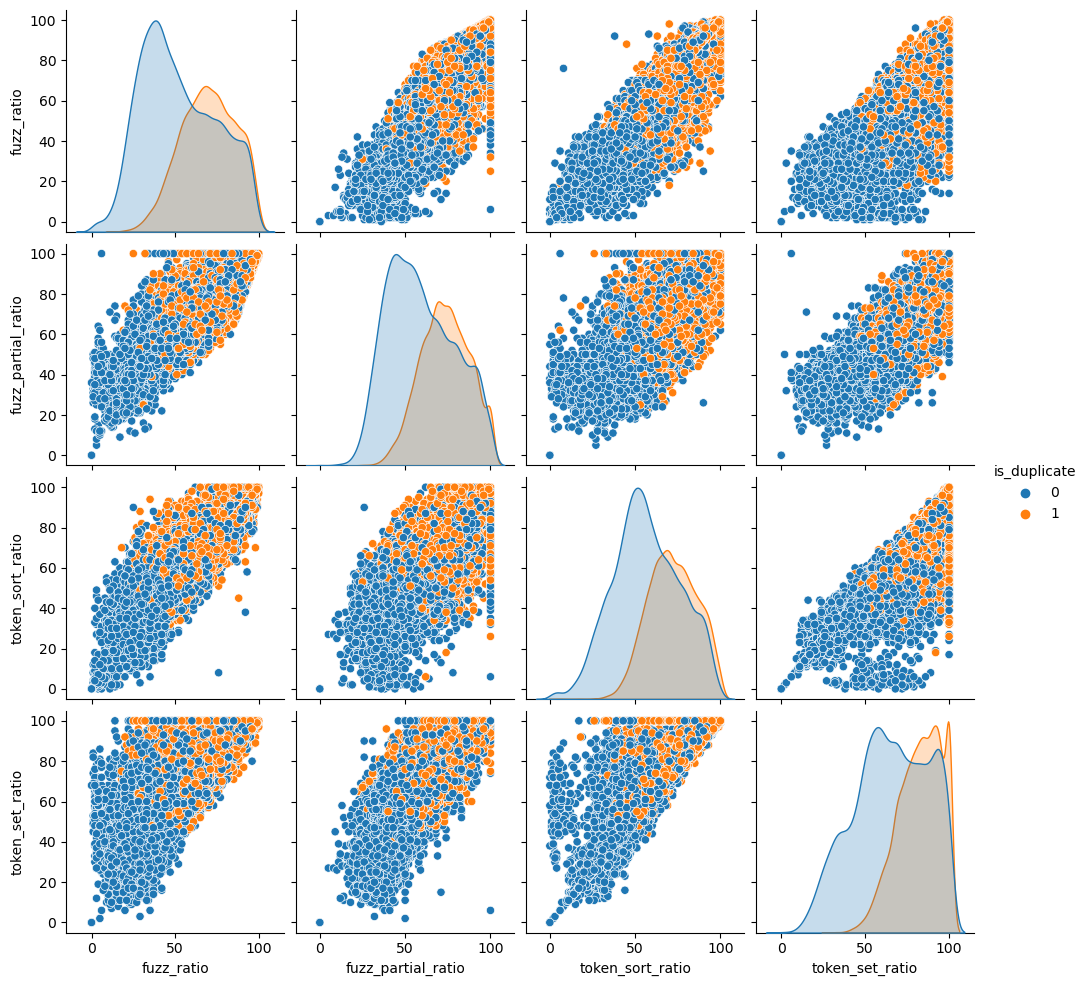

In [29]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

### t-SNE for Dimensionality Reduction and Visualization

In [30]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimension

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [31]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.044s...
[t-SNE] Computed neighbors for 30000 samples in 4.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

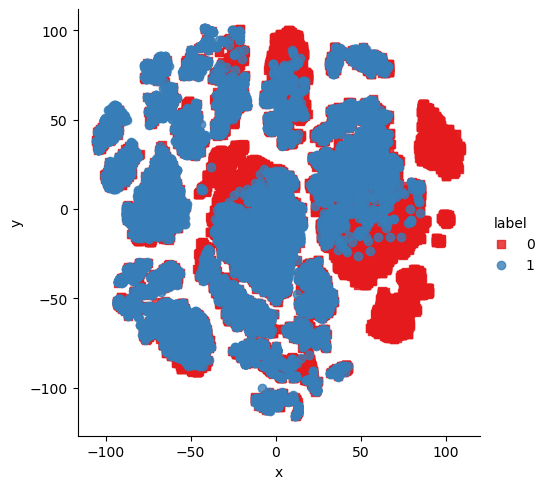

In [32]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])


In [33]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.053s...
[t-SNE] Computed neighbors for 30000 samples in 4.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [34]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [35]:
## Extract questions from the dataframe
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
120567                          how does the boggart work   
324466  what is difference between project manager and...   
398558  what hotel in jabalpur would be safe for unmar...   
339914  what is stronger   super saiyan 4 or super sai...   
185732  how do i fill in address line 1 and address li...   

                                                question2  
120567             what would the boggart of a boggart be  
324466  what are the differences between project manag...  
398558  what hotel in allahabad would be safe for unma...  
339914            how does gohan turn into super saiyan 2  
185732              how do i register desired web address

In [36]:
# Drop unnecessary columns for model training
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
120567             0      25      38             5             8            2   
324466             0      62      75             9            10            4   
398558             0     123     124            23            23           18   
339914             0      53      39            12             8            2   
185732             0      50      37            12             7            4   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
120567          12        0.17  0.499975  0.499975  ...  0.249997   
324466          17        0.24  0.249994  0.249994  ...  0.399996   
398558          38        0.47  0.909083  0.909083  ...  0.849996   
339914          17        0.12  0.399992  0.399992  ...  0.199998   
185732          17        0.24  0.249994  0.199996  ...  0.333331   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
120567           0.0            0.0           3.0       6.5   
324466           0.0            1.0           1.0       9.5   
398558           1.0            1.0           0.0      20.0   
339914           0.0            0.0           2.0       9.0   
185732           0.0            1.0           5.0       9.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
120567              0.500000          57                  68   
324466              0.365079          76                  77   
398558              0.814516          96                  95   
339914              0.350000          48                  54   
185732              0.236842          46                  54   

        token_sort_ratio  token_set_ratio  
120567                57               65  
324466                74               76  
398558                92               96  
339914                49               55  
185732                57               60  

[5 rows x 23 columns]

### Feature Extraction using CountVectorizer 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

# initialize CV with a max of 3000 features
cv = CountVectorizer(max_features=3000)

# Fit and transform the questions to bag-of-words representation
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [38]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

####  Final Data 

In [39]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
120567             0      25      38             5             8            2   
324466             0      62      75             9            10            4   
398558             0     123     124            23            23           18   
339914             0      53      39            12             8            2   
185732             0      50      37            12             7            4   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
120567          12        0.17  0.499975  0.499975  ...     0     0     0   
324466          17        0.24  0.249994  0.249994  ...     0     0     0   
398558          38        0.47  0.909083  0.909083  ...     0     0     0   
339914          17        0.12  0.399992  0.399992  ...     0     0     0   
185732          17        0.24  0.249994  0.199996  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
120567     0     0     0     0     0     0     0  
324466     0     0     0     0     0     0     0  
398558     0     0     0     0     0     0     0  
339914     0     0     0     0     0     0     0  
185732     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

### Model Training and Evaluation

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

## RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7898333333333334

## XGBoost Classifier

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.795

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3244,  567],
       [ 694, 1495]], dtype=int64)

In [45]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3187,  624],
       [ 606, 1583]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Hyperparameter Tuning with GridSearchCV

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Define hyperparameter space to search
param_grid = {
    'max_depth': [3, 5, 7],       # Maximum depth of the tree
    'learning_rate': [0.01, 0.1],  # Step size shrinkage used in the update to prevent overfitting
    'n_estimators': [100, 200],   # Number of boosting rounds (trees) to build
}

# Perform GridSearchCV for hyperparameter tuning and CV
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final XGBoost model using the best hyperparameters on the entire training data
final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = final_xgb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final XGBoost Model Accuracy: {accuracy}")


Final XGBoost Model Accuracy: 0.7941666666666667


###  Additional Helper Functions

In [48]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [49]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [50]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [51]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [52]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

### Final Query Function

In [53]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [54]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [55]:
rf.predict(query_point_creator(q1,q4))

array([0], dtype=int64)

In [56]:
cv

CountVectorizer(max_features=3000)

In [57]:
#import pickle

#pickle.dump(rf,open('model.pkl','wb'))
#pickle.dump(cv,open('cv.pkl','wb'))